# 1. Import

In [3]:
# Import Library

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import f_regression

In [4]:
# Import Data

R10D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Jari-jari%20Kelengkungan%20Reflektor/R10%20D10.csv')
R12D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Jari-jari%20Kelengkungan%20Reflektor/R12%20D10.csv')
R14D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Jari-jari%20Kelengkungan%20Reflektor/R14%20D10.csv')
R16D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Jari-jari%20Kelengkungan%20Reflektor/R16%20D10.csv')
R18D10 = pd.read_csv('https://raw.githubusercontent.com/RizqiSeijuuro/Tugas-Akhir-S1/main/Data%20Penelitian%20TA/Variasi%20Jari-jari%20Kelengkungan%20Reflektor/R18%20D10.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2. Data Understanding

In [5]:
# Read DataFrame
R12D10

,TIME,Datetime,Intensity,UV Index,Voltage
0,22:33:45.13,6/7/22 22:37:48,0.13,0.0,0.09
1,22:33:44.07,6/7/22 22:37:47,0.14,0.0,0.09
2,22:33:43.02,6/7/22 22:37:46,0.13,0.0,0.09
3,22:33:41.95,6/7/22 22:37:45,0.13,0.0,0.09
4,22:33:40.92,6/7/22 22:37:44,0.14,0.0,0.09
...,...,...,...,...,...
1000001,NaN,NaN,NaN,NaN,NaN
1000002,NaN,NaN,NaN,NaN,NaN
1000003,NaN,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get Info about DataFrame
R10D10.info()
R12D10.info()
R14D10.info()
R16D10.info()
R18D10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000006 entries, 0 to 1000005
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       4655 non-null   object 
 1   Datetime   4655 non-null   object 
 2   Intensity  4655 non-null   float64
 3   UV Index   4655 non-null   float64
 4   Voltage    4655 non-null   float64
dtypes: float64(3), object(2)
memory usage: 38.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000006 entries, 0 to 1000005
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       4433 non-null   object 
 1   Datetime   4433 non-null   object 
 2   Intensity  4433 non-null   float64
 3   UV Index   4433 non-null   float64
 4   Voltage    4433 non-null   float64
dtypes: float64(3), object(2)
memory usage: 38.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000006 entries, 0 to 1000005
Data columns (total 5 columns)

In [7]:
# Descriptive Statistics about data
R12D10.describe()

,Intensity,UV Index,Voltage
count,4433.000000,4433.0,4433.000000
mean,0.123663,0.0,0.082973
std,0.016154,0.0,0.004909
min,0.080000,0.0,0.050000
25%,0.120000,0.0,0.080000
50%,0.120000,0.0,0.080000
75%,0.130000,0.0,0.090000
max,1.120000,0.0,0.100000


In [8]:
# Drop Missing Values & Change data type to datetime

R10D10 = R10D10.dropna().iloc[::-1].reset_index()
R12D10 = R12D10.dropna().iloc[::-1].reset_index()
R14D10 = R14D10.dropna().iloc[::-1].reset_index()
R16D10 = R16D10.dropna().iloc[::-1].reset_index()
R18D10 = R18D10.dropna().iloc[::-1].reset_index()
R10D10['Datetime'] = pd.to_datetime(R10D10['Datetime'], dayfirst=True)
R12D10['Datetime'] = pd.to_datetime(R12D10['Datetime'], dayfirst=True)
R14D10['Datetime'] = pd.to_datetime(R14D10['Datetime'], dayfirst=True)
R16D10['Datetime'] = pd.to_datetime(R16D10['Datetime'], dayfirst=True)
R18D10['Datetime'] = pd.to_datetime(R18D10['Datetime'], dayfirst=True)
R12D10

,index,TIME,Datetime,Intensity,UV Index,Voltage
0,4432,21:15:47.16,2022-07-06 21:19:50,0.13,0.0,0.09
1,4431,21:15:48.24,2022-07-06 21:19:51,0.14,0.0,0.09
2,4430,21:15:49.30,2022-07-06 21:19:52,0.13,0.0,0.09
3,4429,21:15:50.36,2022-07-06 21:19:53,0.14,0.0,0.09
4,4428,21:15:51.43,2022-07-06 21:19:54,0.13,0.0,0.09
...,...,...,...,...,...,...
4428,4,22:33:40.92,2022-07-06 22:37:44,0.14,0.0,0.09
4429,3,22:33:41.95,2022-07-06 22:37:45,0.13,0.0,0.09
4430,2,22:33:43.02,2022-07-06 22:37:46,0.13,0.0,0.09
4431,1,22:33:44.07,2022-07-06 22:37:47,0.14,0.0,0.09


In [9]:
# Get Info about DataFrame
R10D10.info()
R12D10.info()
R14D10.info()
R16D10.info()
R18D10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      4655 non-null   int64         
 1   TIME       4655 non-null   object        
 2   Datetime   4655 non-null   datetime64[ns]
 3   Intensity  4655 non-null   float64       
 4   UV Index   4655 non-null   float64       
 5   Voltage    4655 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 218.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433 entries, 0 to 4432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      4433 non-null   int64         
 1   TIME       4433 non-null   object        
 2   Datetime   4433 non-null   datetime64[ns]
 3   Intensity  4433 non-null   float64       
 4   UV Index   4433 non-null   float64       


In [10]:
# Create Function to Visualise Histogram & Boxplot
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, dpi=216, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = data, x = column, ax = ax_box)
    sns.histplot(data = data, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

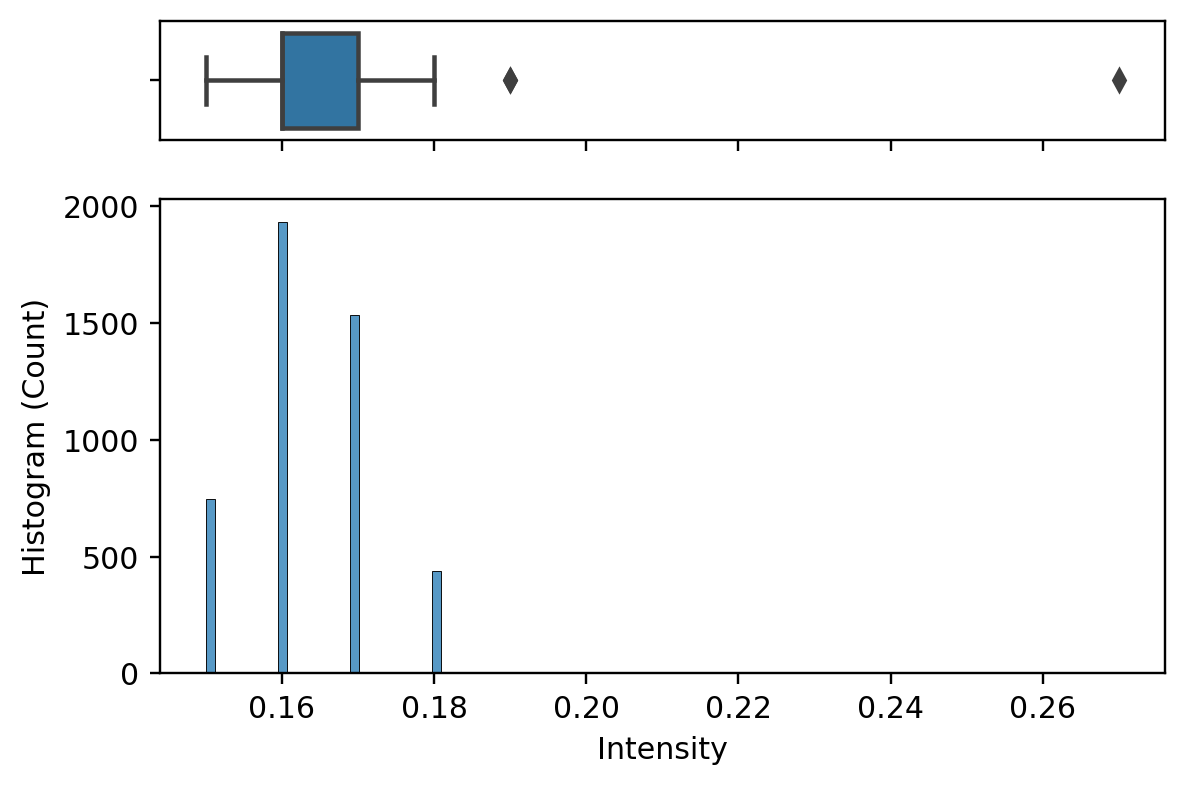

In [11]:
vis_univar(R10D10, 'Intensity')

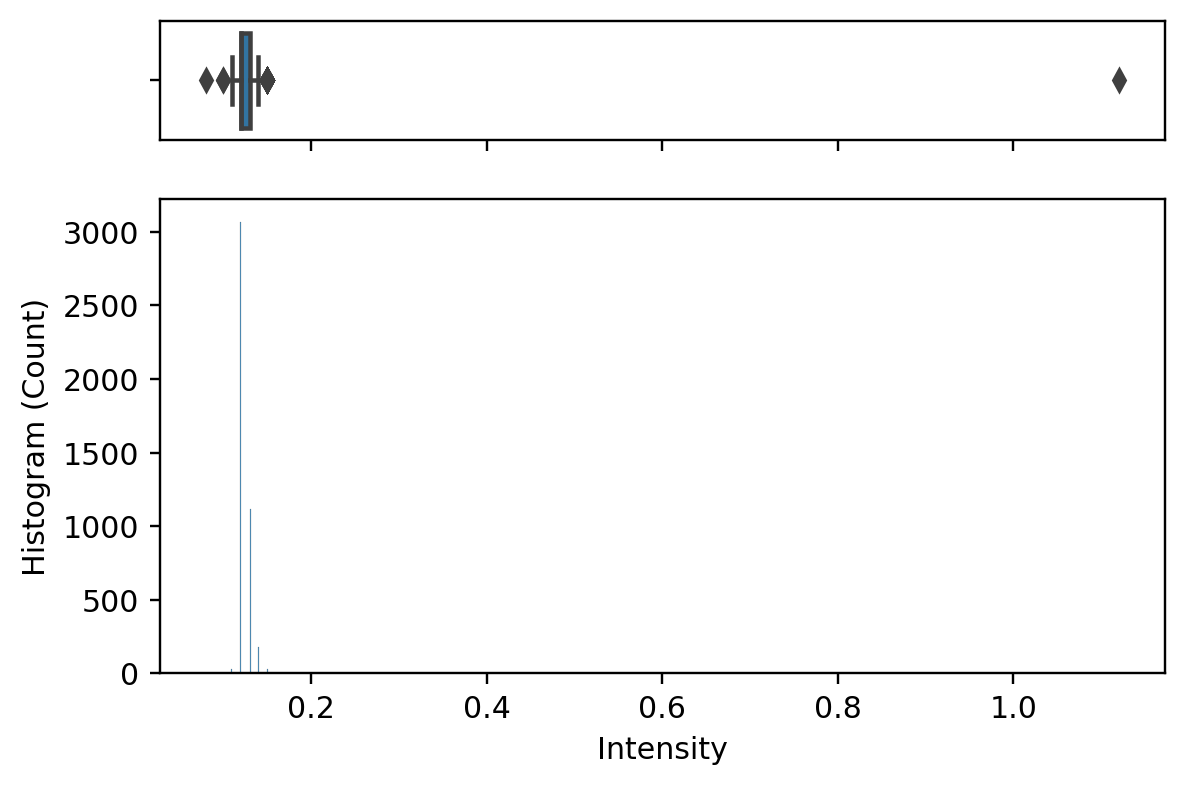

In [12]:
vis_univar(R12D10, 'Intensity')

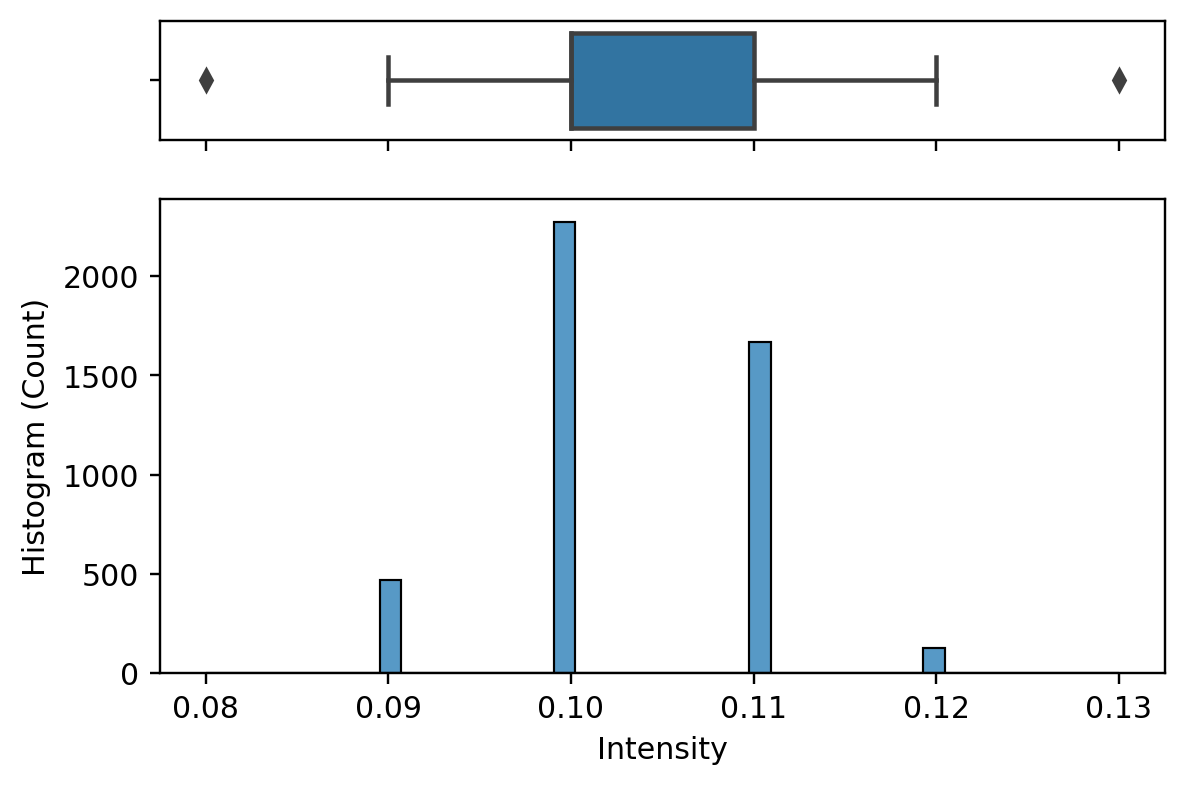

In [13]:
vis_univar(R14D10, 'Intensity')

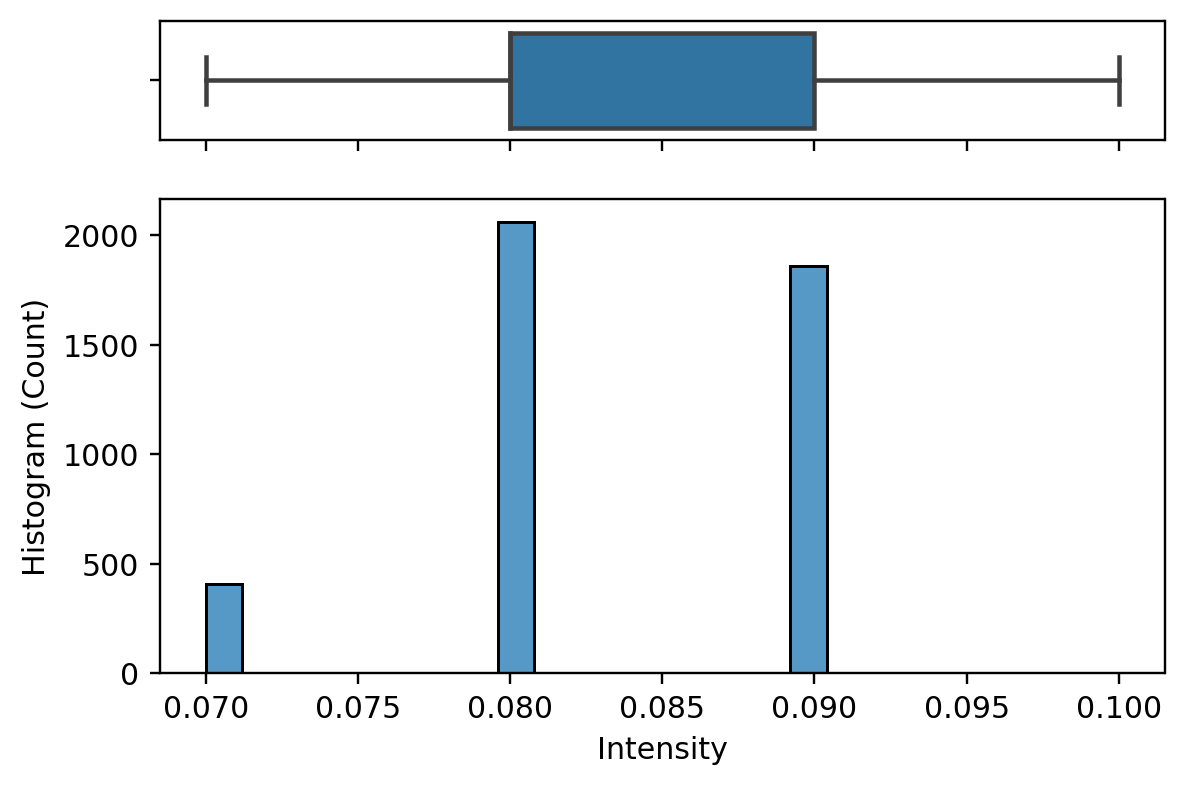

In [14]:
vis_univar(R16D10, 'Intensity')

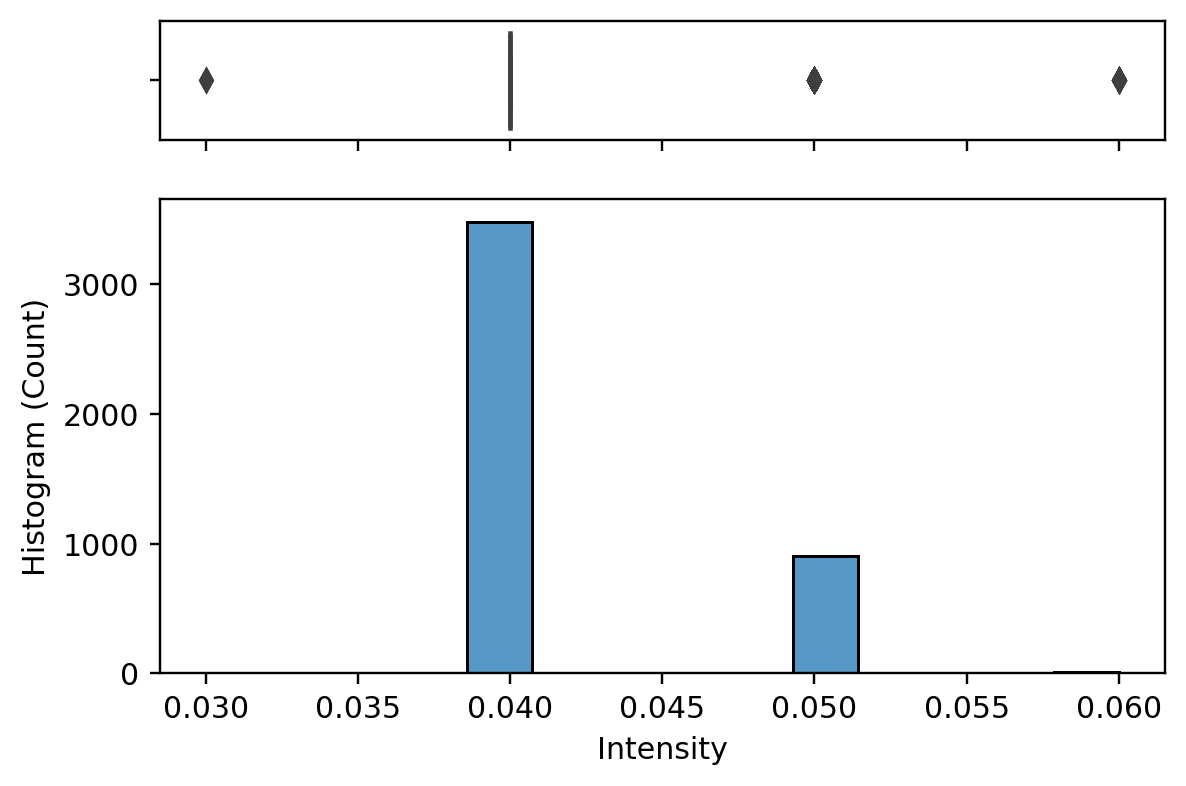

In [15]:
vis_univar(R18D10, 'Intensity')

# 3. Data Manipulation

In [16]:
# Create Function to Get mean every session
def reratasesi(data):
  intensity = []  
  for i in range(7):
    a = i*600
    b = 600*i+599
    intensity.append(data.loc[a:b,'Intensity'].mean())
  return intensity

In [17]:
r10 = reratasesi(R10D10)
r12 = reratasesi(R12D10)
r14 = reratasesi(R14D10)
r16 = reratasesi(R16D10)
r18 = reratasesi(R18D10)

In [18]:
df = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '10' : r10,
                   '12' : r12,
                   '14' : r14,
                   '16' : r16,
                   '18' : r18})
df

,Sesi,10,12,14,16,18
0,1,0.158567,0.129233,0.098433,0.076733,0.042067
1,2,0.156833,0.124383,0.100050,0.082867,0.042050
2,3,0.158200,0.123700,0.100950,0.083150,0.042083
3,4,0.162350,0.120550,0.101850,0.083750,0.041700
4,5,0.162100,0.122383,0.104767,0.084817,0.041917
5,6,0.172550,0.121317,0.106100,0.085000,0.042117
6,7,0.170233,0.123483,0.107667,0.086350,0.042800


In [19]:
df3 = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '10 cm' : r10,
                   '12 cm' : r12,
                   '14 cm' : r14,
                   '16 cm' : r16,
                   '18 cm' : r18})
df3.to_excel('Data Penelitian Skripsi/Variasi Jari-jari Kelengkungan Reflektor/Mean R.xlsx')
df3

,Sesi,10 cm,12 cm,14 cm,16 cm,18 cm
0,1,0.158567,0.129233,0.098433,0.076733,0.042067
1,2,0.156833,0.124383,0.100050,0.082867,0.042050
2,3,0.158200,0.123700,0.100950,0.083150,0.042083
3,4,0.162350,0.120550,0.101850,0.083750,0.041700
4,5,0.162100,0.122383,0.104767,0.084817,0.041917
5,6,0.172550,0.121317,0.106100,0.085000,0.042117
6,7,0.170233,0.123483,0.107667,0.086350,0.042800


In [20]:
# Create Function to Get Standard Deviation every session
def stdsesi(data):
  intensity = []  
  for i in range(7):
    a = i*600
    b = 600*i+599
    intensity.append(data.loc[a:b,'Intensity'].std())
  return intensity

r10 = stdsesi(R10D10)
r12 = stdsesi(R12D10)
r14 = stdsesi(R14D10)
r16 = stdsesi(R16D10)
r18 = stdsesi(R18D10)

In [21]:
df4 = pd.DataFrame({'Sesi' : [i+1 for i in range(7)],
                    '10 cm' : r10,
                   '12 cm' : r12,
                   '14 cm' : r14,
                   '16 cm' : r16,
                   '18 cm' : r18})
df4.to_excel('Data Penelitian Skripsi/Variasi Jari-jari Kelengkungan Reflektor/Std R.xlsx')
df4

,Sesi,10 cm,12 cm,14 cm,16 cm,18 cm
0,1,0.006111,0.008672,0.005967,0.006638,0.004094
1,2,0.006301,0.005628,0.005735,0.005903,0.004162
2,3,0.006721,0.005919,0.005887,0.005654,0.004186
3,4,0.006587,0.003090,0.006670,0.005845,0.003759
4,5,0.008309,0.040902,0.006378,0.005539,0.003982
5,6,0.006005,0.003846,0.006287,0.005390,0.004088
6,7,0.006584,0.005074,0.006051,0.005249,0.004711


In [22]:
df2 = pd.melt(df, id_vars =['Sesi'], value_vars =['10','12','14','16','18'],
              var_name ='Jari-jari', value_name ='Rerata Intensitas')
df2['Jari-jari'] = df2['Jari-jari'].astype(int)
df2

,Sesi,Jari-jari,Rerata Intensitas
0,1,10,0.158567
1,2,10,0.156833
2,3,10,0.158200
3,4,10,0.162350
4,5,10,0.162100
5,6,10,0.172550
6,7,10,0.170233
7,1,12,0.129233
8,2,12,0.124383
9,3,12,0.123700


# 4. Modelling & Data Visualization

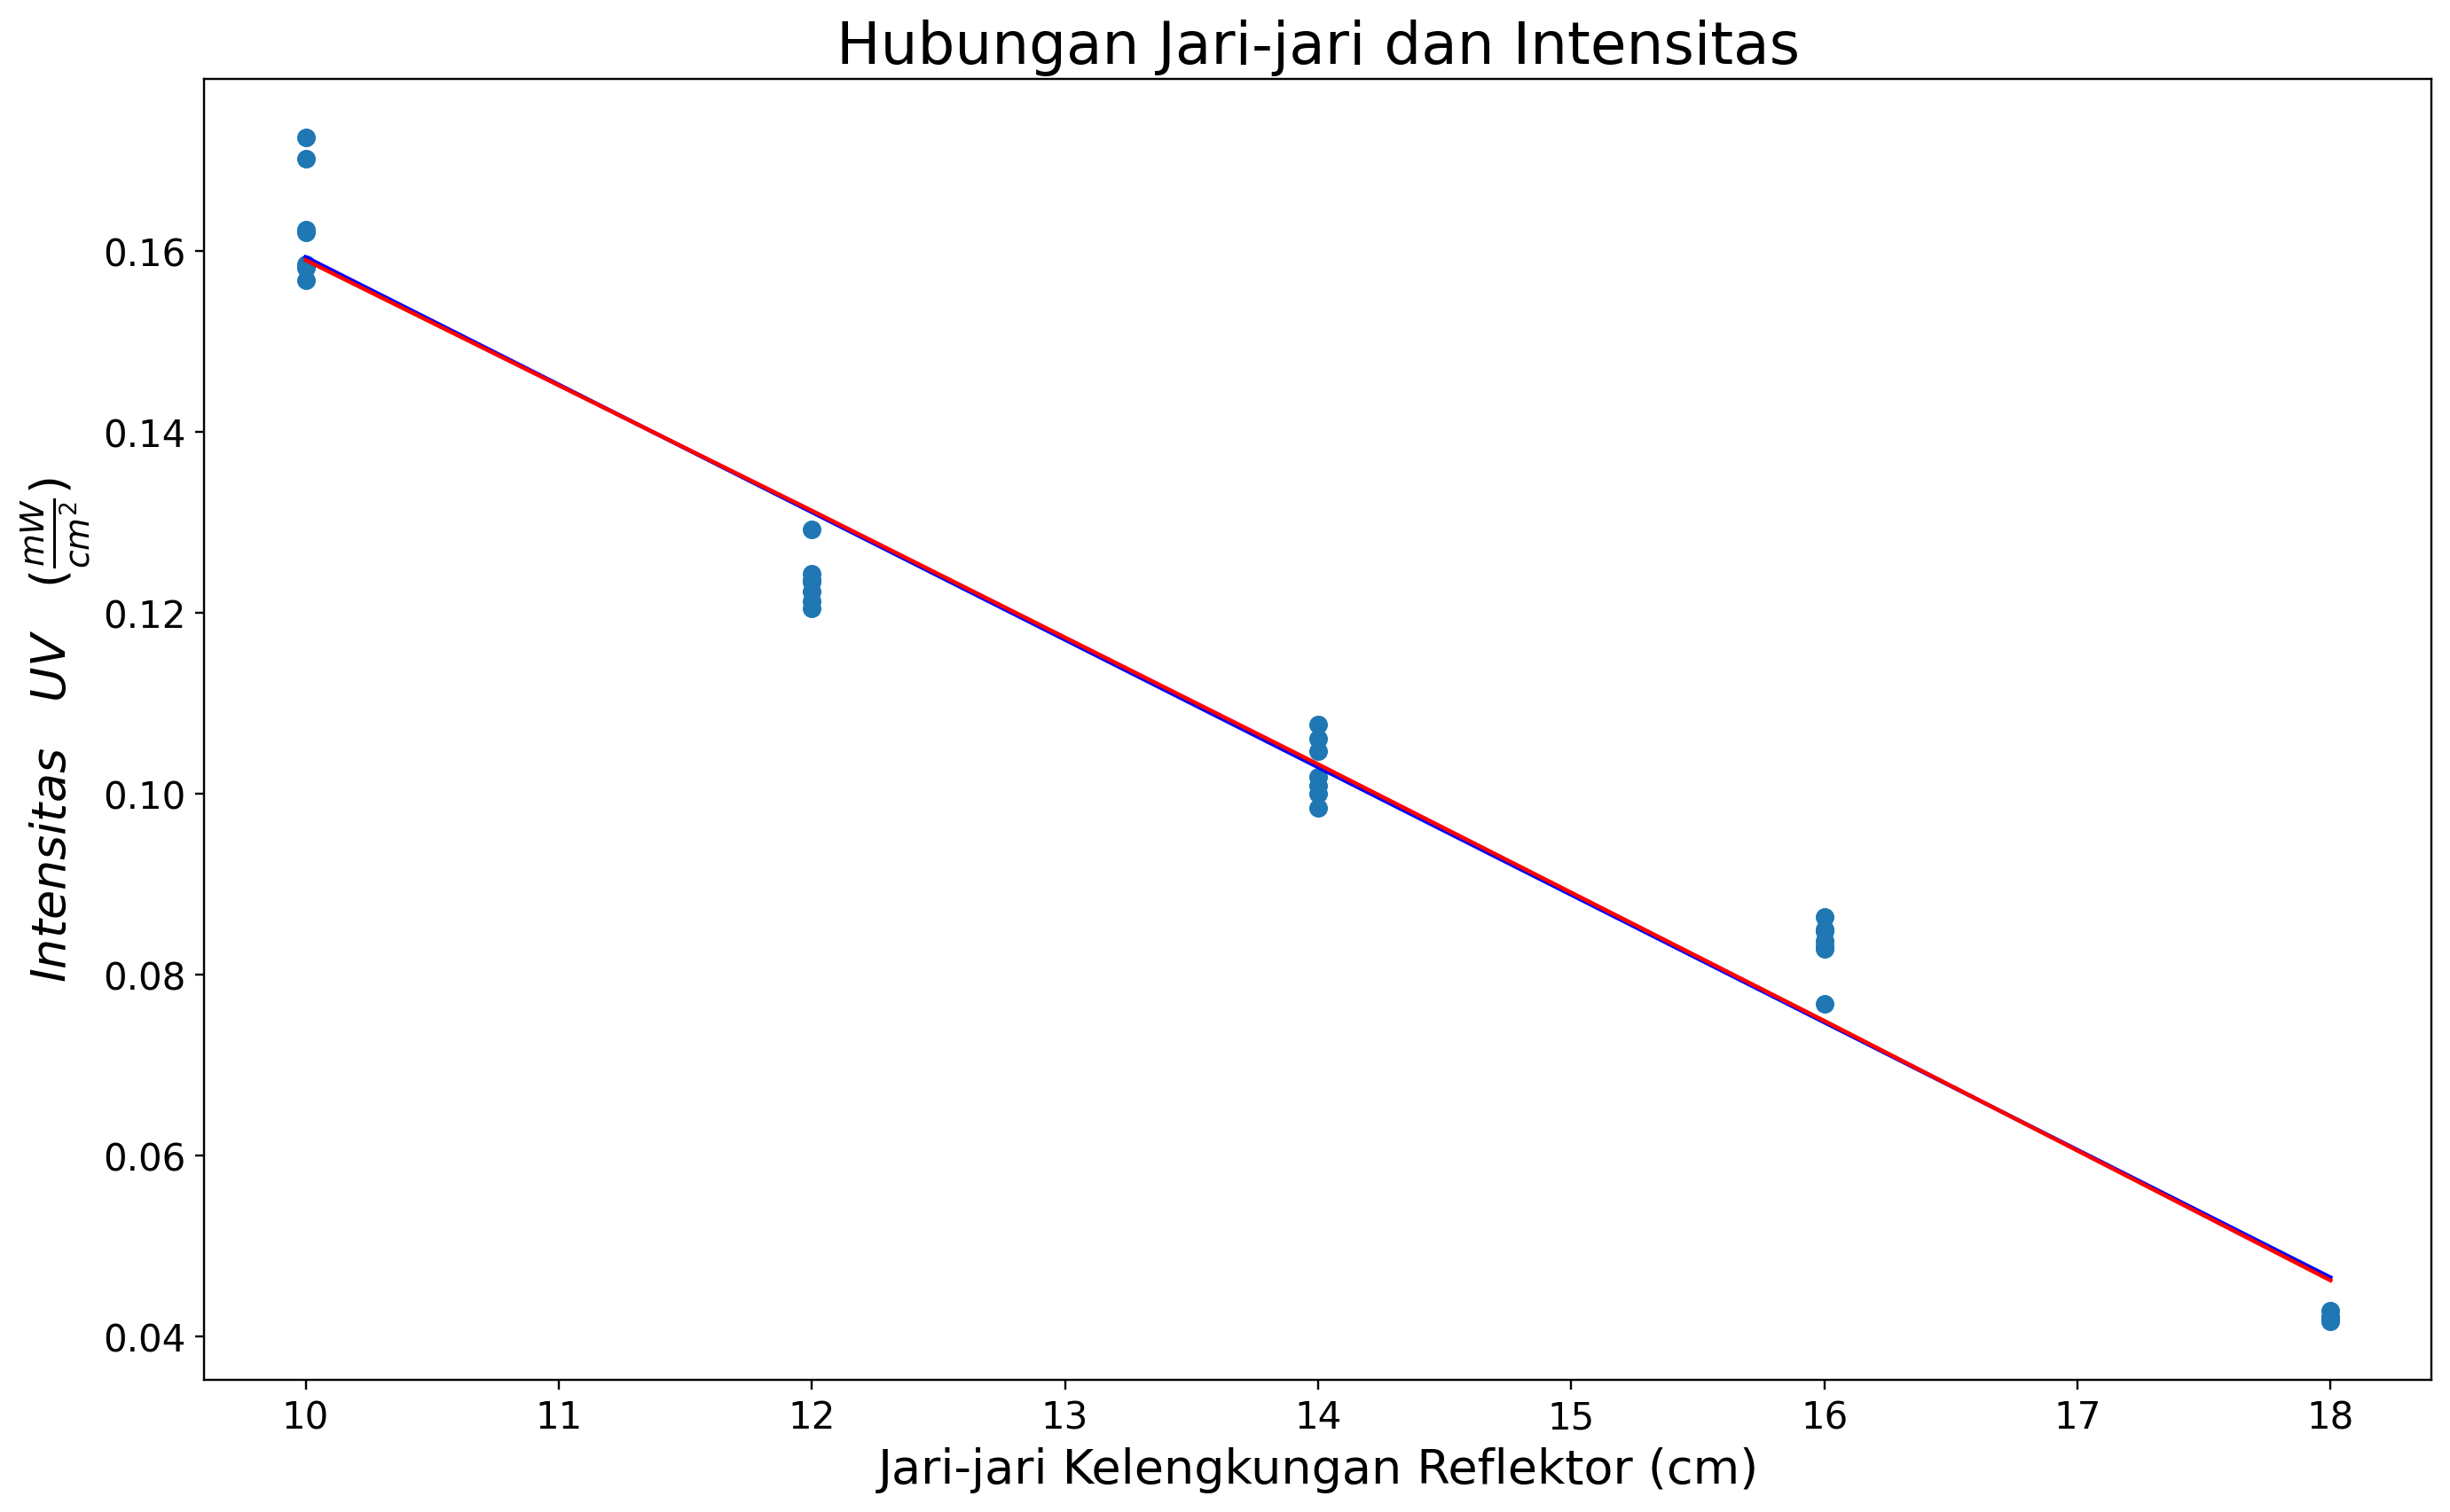

In [23]:
# Create Linear & Polynomial Regression & Visualize it

x = df2['Jari-jari'].array
y = df2['Rerata Intensitas'].array

linear = np.polyfit(x, y, 1)
predict = np.poly1d(linear)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(15, 9), dpi=216)
plt.title("Hubungan Jari-jari dan Intensitas", fontsize=22)
plt.xlabel('Jari-jari Kelengkungan Reflektor (cm)', fontsize='18')
plt.ylabel(r'$ Intensitas \quad UV \quad (\frac{mW}{cm^2})$', fontsize='18')
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
plt.scatter(x, y)
plt.plot(x, predict(x), c = 'b')
plt.plot(x, y_predicted, c="red")
plt.show()

# 5. Evaluation Metrics

In [24]:
# Get Metrics for Regression Models

fscores_linear, pvalues_linear = f_regression(y.reshape(-1, 1), y_predicted.reshape(-1, 1))
fscores_poly, pvalues_poly = f_regression(y.reshape(-1, 1), predict(x).reshape(-1, 1))

print('Hasil Linear Model'.center(100))
print('-'*100)
print('Koefisien dan Konstanta Linear Model = {} dan {}'.format(linear[0],linear[1]))
print('r2 =', (r2_score(y, y_predicted)))
print('F-score:', fscores_linear[0])
print('p-values: {}'.format(pvalues_linear[0]))
print('MAPE =', mean_absolute_percentage_error(y, y_predicted)*100, '%')
print('')
print('Hasil Polynomial Model (Degree: 2)'.center(100))
print('-'*100)
print('Koefisien dan Konstanta Polynomial Model =', poly_reg_model.coef_, 'dan', poly_reg_model.intercept_)
print('r2 =', (r2_score(y, predict(x))))
print('F-score:', fscores_poly[0])
print('p-values: {}'.format(pvalues_poly[0]))
print('MAPE =', mean_absolute_percentage_error(y, predict(x))*100, '%')

                                         Hasil Linear Model                                         
----------------------------------------------------------------------------------------------------
Koefisien dan Konstanta Linear Model = -0.014104166666666675 dan 0.3004040476190476
r2 = 0.9731765344520392
F-score: 1197.2660870200857
p-values: 1.642297862300146e-27
MAPE = 6.347365360981049 %

                                 Hasil Polynomial Model (Degree: 2)                                 
----------------------------------------------------------------------------------------------------
Koefisien dan Konstanta Polynomial Model = [-1.29458333e-02 -4.13690476e-05] dan 0.29262666666666637
r2 = 0.9731296515036476
F-score: 1195.1195386983306
p-values: 1.6903458493512177e-27
MAPE = 6.501884846491507 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Get Pearson Correlation & P-values

print('Korelasi Pearson untuk Variabel Jari-jari'.center(41))
print('Kelengkungan Reflektor dan Iradiasi'.center(41))
print(('-'*41))
print('Korelasi Pearson: {}'.format(df2['Jari-jari'].corr(df2['Rerata Intensitas'], 'pearson')))
scores, pvalues = f_regression(df2.iloc[:, 1].values.reshape(-1, 1), df2.iloc[:, -1].values.reshape(-1, 1))
print('p-values: {}'.format(pvalues[0]))
print('N: {}'.format(df2.shape[0]))

Korelasi Pearson untuk Variabel Jari-jari
   Kelengkungan Reflektor dan Iradiasi   
-----------------------------------------
Korelasi Pearson: -0.9864733404931162
p-values: 1.6903458493505257e-27
N: 35


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
